In [ ]:
!wget https://www.dropbox.com/s/f86pf0bdby8wcnq/covidDataset.zip?dl=0

In [ ]:
!unzip covidDataset.zip\?dl\=0

In [2]:
#import libraries and packages

from numpy.random import seed
seed(8) #1

import tensorflow
tensorflow.random.set_seed(7)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf

from tensorflow.python.keras import models
from tensorflow.python.keras import layers

from tensorflow.keras import optimizers

Using TensorFlow backend.


In [3]:

print(os.listdir("/content/4"))

#Print and remove zips once done



['TS', 'TR']


In [4]:
from os import listdir
#data_list = listdir('/content/covid-19/four_classes/train')
data_list = listdir('/content/4/TR')

#Delete some classes that may interfere

print(len(data_list))


DATASET_PATH  = '/content/4/TR'
test_dir =  '/content/4/TS'
IMAGE_SIZE    = (150, 150)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 50
LEARNING_RATE =0.0001



#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')



# For multiclass use categorical n for binary use binary
train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                     rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')             batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="categorical"   #For multiclass use categorical n for binary use binary
                                                  )

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="categorical"  #For multiclass use categorical n for binary use binary
                                                 
                                                  )

4
Found 1531 images belonging to 4 classes.
Found 381 images belonging to 4 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [5]:
#Simple CNN model based on Xception. Set dense layer neuron count same as the no. of output classes 
#If you wnna use a saved model then skip this step


from tensorflow.keras.applications import Xception

conv_base = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))


conv_base.trainable = True


model = models.Sequential()
model.add(conv_base)




model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))


model.compile(loss='categorical_crossentropy',     #for multiclass use categorical_crossentropy
              
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['acc'])

In [6]:

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dropout (Dropout)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               13107456  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 33,969,964
Trainable params: 33,915,436
Non-trainable params: 54,528
_________________________________________________________________
None


In [7]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

result=model.fit_generator(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= NUM_EPOCHS,                        
                       )

48
12
Instructions for updating:
Please use Model.fit, which supports generators.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
47/47 [==============================] - 582s 12s/step - loss: 0.8745 - acc: 0.6851 - val_loss: 1.7946 - val_acc: 0.6534
Epoch 2/50
47/47 [==============================] - 581s 12s/step - loss: 0.5365 - acc: 0.8072 - val_loss: 1.1366 - val_acc: 0.7301
Epoch 3/50
47/47 [==============================] - 581s 12s/step - loss: 0.4774 - acc: 0.8212 - val_loss: 0.6426 - val_acc: 0.8068
Epoch 4/50
47/47 [==============================] - 578s 12s/step - loss: 0.4042 - acc: 0.8552 - val_loss: 0.5371 - val_acc: 0.8097
Epoch 5/50
47/47 [==============================] - 579s 12s/step - loss: 0.4012 - acc: 0.8512 - val_loss: 0.6261 - val_acc: 0.7670
Epoch 6/50
47/47 [==============================] - 580s 12s/step - loss: 0.3456 - acc: 0.8726 - val_loss: 0.5614 - val_acc: 0.7983
Epoch 7/50
47/47 [==============================] - 580s 12s/step - loss: 0.3629 - acc: 0.8646 - val_loss: 0.4795 - val_acc: 0.8097
Epoch 8/50
47/47 [==============================] - 581s 12s/step - loss: 0.

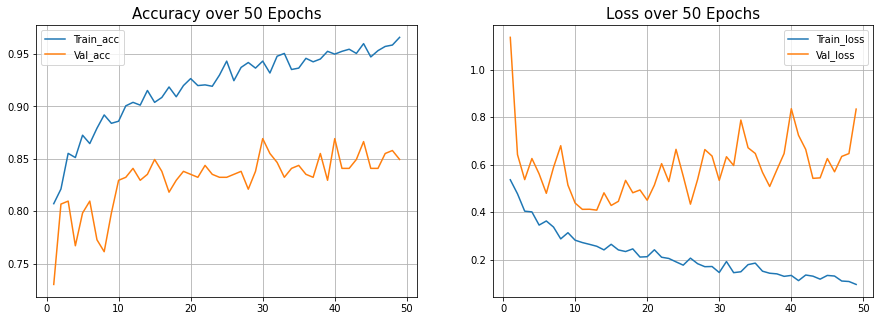

In [9]:
#Plot the accuracy and loss graphs

import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Val_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 50)

In [10]:
#Save the trained model and copy to drive

model.save('4c-Covid19-Mod-Xception.h5')
#!cp /content/"4-class-Covid19-Mod-Xception.h5" /content/drive/"My Drive"/"Colab Notebooks"

In [11]:
# Create evaluate data generator from test set
#Dont forget shuffle false

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_dir =  '/content/4/TS'
eval_generator = test_datagen.flow_from_directory(test_dir,target_size=IMAGE_SIZE,batch_size=1, 
                                                  shuffle=False, seed=42, class_mode="categorical")
eval_generator.reset()

Found 440 images belonging to 4 classes.


In [12]:
#Evalute the trained model on evaluate generator
eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator)), 
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1,
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])

#Poor test accuracy due to the small dataset size

Instructions for updating:
Please use Model.evaluate, which supports generators.
440/440 [==============================] - 61s 138ms/step - loss: 0.6465 - acc: 0.8273
Test loss: 0.6464776396751404
Test accuracy: 0.8272727131843567


In [14]:
IMAGE_SIZE    = (150, 150)
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_dir =  '/content/4/TS'
pred_generator = test_datagen.flow_from_directory(
        test_dir,target_size=IMAGE_SIZE,
        batch_size=1,
        shuffle=False,
        
        seed=42,
        
        class_mode="categorical")
pred_generator.reset()   

count=[0,0,0,0]

files=pred_generator.filenames

for i in range(len(files)):
  x,y = pred_generator.next()
  img = x
  predict=model.predict(img)
  
  p=np.argmax(predict, axis=-1)
  print(str(p[0])+" "+files[pred_generator.batch_index-1])
  #print(predict)
  #p=model.predict_classes(img)
  count[p[0]]+=1
  
#print(str(p[0])+" "+files[i]) 
print(count)

Found 440 images belonging to 4 classes.
0 bacteria/person101_bacteria_483.jpeg
0 bacteria/person101_bacteria_484.jpeg
0 bacteria/person101_bacteria_485.jpeg
0 bacteria/person101_bacteria_486.jpeg
0 bacteria/person102_bacteria_487.jpeg
0 bacteria/person103_bacteria_488.jpeg
0 bacteria/person103_bacteria_489.jpeg
0 bacteria/person103_bacteria_490.jpeg
0 bacteria/person108_bacteria_506.jpeg
0 bacteria/person108_bacteria_507.jpeg
0 bacteria/person108_bacteria_511.jpeg
0 bacteria/person109_bacteria_512.jpeg
0 bacteria/person109_bacteria_517.jpeg
0 bacteria/person109_bacteria_519.jpeg
0 bacteria/person109_bacteria_522.jpeg
0 bacteria/person113_bacteria_543.jpeg
0 bacteria/person119_bacteria_568.jpeg
0 bacteria/person120_bacteria_573.jpeg
0 bacteria/person121_bacteria_580.jpeg
0 bacteria/person123_bacteria_587.jpeg
0 bacteria/person125_bacteria_595.jpeg
0 bacteria/person127_bacteria_603.jpeg
0 bacteria/person128_bacteria_608.jpeg
0 bacteria/person130_bacteria_626.jpeg
0 bacteria/person132_ba

In [15]:
train_batches.class_indices

{'bacteria': 0, 'covid19': 1, 'normal': 2, 'viral': 3}

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report



filenames = eval_generator.filenames
nb_samples = len(filenames)
eval_generator.reset()  
predict = model.predict_generator(eval_generator,steps = np.ceil(len(eval_generator)))
pp=predict
predict=np.argmax(predict, axis=-1)
classes= eval_generator.classes[eval_generator.index_array]
acc=sum(predict==classes)/len(predict)
names=["bacteria, covid19, normal, viral"]
#print(confusion_matrix(classes,predict))

font = {
'family': 'Times New Roman',
'size': 12
}
plt.rc('font', **font)
cm = confusion_matrix(classes, predict)
print(cm)
print(classification_report(classes,predict))


Instructions for updating:
Please use Model.predict, which supports generators.
[[ 91   0   7   2]
 [  1  27   1   0]
 [ 12   0 211   3]
 [ 33   0  17  35]]
              precision    recall  f1-score   support

           0       0.66      0.91      0.77       100
           1       1.00      0.93      0.96        29
           2       0.89      0.93      0.91       226
           3       0.88      0.41      0.56        85

    accuracy                           0.83       440
   macro avg       0.86      0.80      0.80       440
weighted avg       0.85      0.83      0.82       440



In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="orange" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 91   0   7   2]
 [  1  27   1   0]
 [ 12   0 211   3]
 [ 33   0  17  35]]


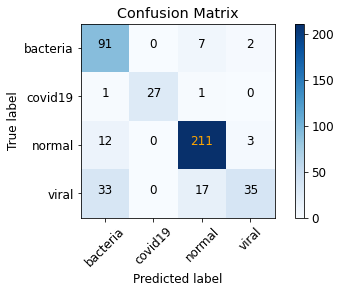

In [20]:
import itertools
cm_plot_labels = ['bacteria', 'covid19', 'normal', 'viral']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')